# Evaluating Trends in No-Show data for Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've selected the no-show appointments dataset for medical patients from Brazil as the basis for my analysis. I developed a few questions about how the data points affect the liklihood a patient will show up for their appointment:

- Which gender has the greater proportion of overall visits and which has a higher rate of no-showing for an appointment?
- How do the specific patient health conditions included in the dataset affect the liklihood a patient will no show?
- Does having free healthcare affect if a patient will show up?
- Are patients who recieve appointment reminders more likely to show up to their appointment?
- Does the rate of no-shows increase/decrease the older the patient?

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [59]:
nsa = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', sep=',')
nsa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [60]:
nsa.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [61]:
nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [62]:
nsa.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [63]:
nsa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I imported all the applicable packages, the data via the CSV file then did basic evaluations of the data to begin to build a plan to clean up the data by reviewing the first few rows of data, data types, stats about the dataframe (quantity of rows/columns), and some of the summary stats for the file. I don't need the patientId or AppointmentID data so I'll drop those columns.



In [64]:
nsa.drop(['PatientId', 'AppointmentID'], axis=1,inplace=True)

In [65]:
colsplit = ['ScheduledDay', 'AppointmentDay']
for c in colsplit:
    nsa[c] = nsa[c].apply(lambda x: x.split("T")[0])

In [66]:
def datetime(i):
    return pd.to_datetime(i)

In [67]:
nsa['ScheduledDay'] = nsa['ScheduledDay'].apply(datetime)
nsa['AppointmentDay'] = nsa['AppointmentDay'].apply(datetime)

In [68]:
nsa.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I began cleaning the data by making the ScheduledDay and AppointmentDay columns the same via a lambda function to remove the time part from the value since the AppointmentDay column did not include a time and would not allow me to clean it programmatically. I then converted the columns to date/time format and evaluated the first few rows again.

In [69]:
nsa = nsa.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'no_show'})

In [70]:
nsa.rename(columns = lambda x: x.lower(), inplace=True)

I next went through and renamed some of the column headers to correct spellings and formats to make them readable by a computer and change every header to lowercase.

In [71]:
nsa['no_show'] = nsa['no_show'].replace({'Yes': '1', 'No': '0'})

In [72]:
nsa['no_show'] = pd.to_numeric(nsa['no_show'])

In [73]:
nsa.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In this section I altered the no_show columns to 0/1 for False/True by using the replace function then changed the data type to numeric to match the formatting of the other T/F columns.

In [74]:
nsa = nsa.query('handicap <= 1')

In [75]:
nsa = nsa.query('age <= 110')

In [76]:
nsa = nsa.query('age >= 0')

In [77]:
nsa = nsa.query('scheduledday <= appointmentday')

In [78]:
nsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110317 entries, 0 to 110526
Data columns (total 12 columns):
gender            110317 non-null object
scheduledday      110317 non-null datetime64[ns]
appointmentday    110317 non-null datetime64[ns]
age               110317 non-null int64
neighbourhood     110317 non-null object
scholarship       110317 non-null int64
hypertension      110317 non-null int64
diabetes          110317 non-null int64
alcoholism        110317 non-null int64
handicap          110317 non-null int64
sms_received      110317 non-null int64
no_show           110317 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.9+ MB


I noticed that the 'Handicap' column included values that were not true or false, I used a query to remove any outlying values from the dataset. The 'Age' column also included both low and high values that were outside of the realm of possibility (negatives) or older than the oldest known person (>110 years). I used a query to remove these outliers from the data. I did a query to remove any values from the scheduledday column that were greater than the appointmentday column, indicating appointments were scheduled after they happened. I reviewed the changes to the dataset with info.

In [79]:
nsa.reset_index(drop=True, inplace=True)

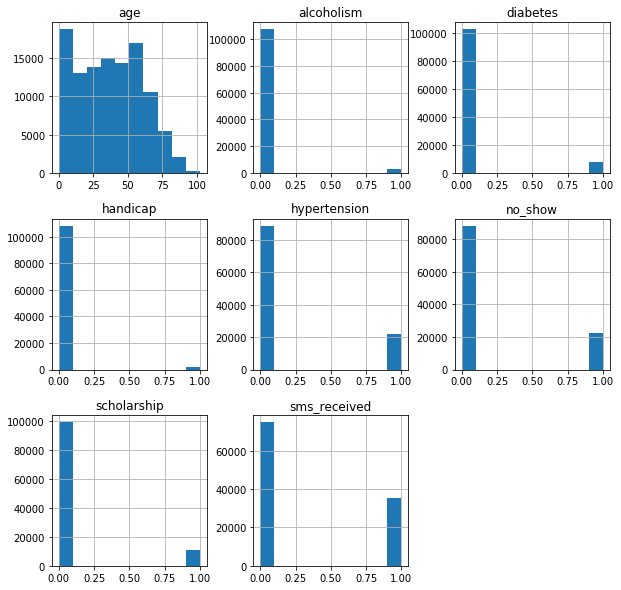

In [80]:
nsa.hist(figsize=(10,10));

After evaluating and cleaning the dataset, I reset the index and use a histogram on all the data to get a high level view of the data points to see how the data could answer the questions about the data.

### Q1. Gender Impact on No-Shows

In [81]:
noshow = nsa.no_show == True
shows = nsa.no_show == False

In [82]:
nsag = nsa.groupby(['gender']).no_show.value_counts()
print(nsag)

gender  no_show
F       0          57160
        1          14562
M       0          30887
        1           7708
Name: no_show, dtype: int64


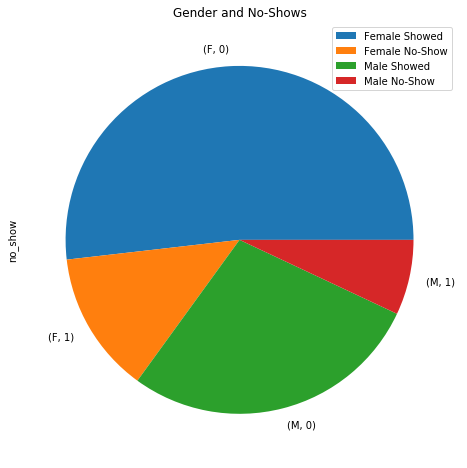

In [83]:
nsa.groupby(['gender','no_show']).no_show.count().plot(kind='pie', figsize=(8,8));
plt.title('Gender and No-Shows');
plt.legend(['Female Showed','Female No-Show','Male Showed','Male No-Show']);
plt.show();

There are a greater quantity of female patients that no-show appointments, however the female no-shows were only ~25% of the quantity of females showing up for appointments. The total quantity of Male no-shows was far smaller (7708) but were proportionally higher than females at around 50% of the quantity of males showing up for their appointments. This is a limited data set but it seems to indicate gender may be a good data point to use as an indicator of if a patient will no-show their appointment. 

### Q2. Free Healthcare Impact on No-Shows


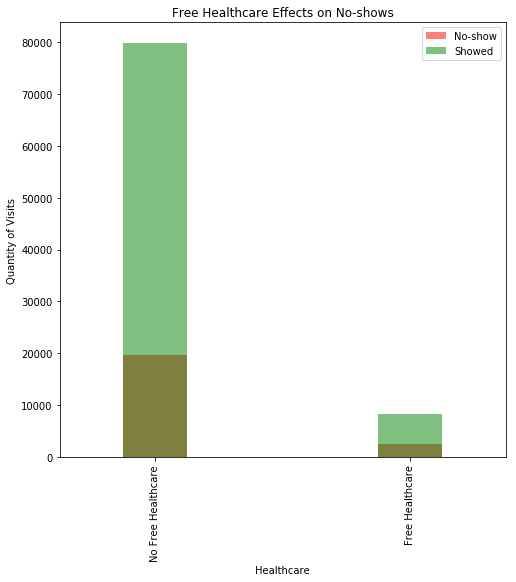

In [84]:
nsa.scholarship[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', figsize=(8,8), width=0.25);
nsa.scholarship[shows].value_counts().plot(kind='bar',alpha=0.5, color='green', figsize=(8,8), width=0.25);
plt.xticks(np.arange(2),('No Free Healthcare','Free Healthcare'))
plt.xlabel('Healthcare')
plt.ylabel('Quantity of Visits')
plt.title('Free Healthcare Effects on No-shows')
plt.legend(['No-show','Showed'])
plt.show()

In [85]:
nsa.groupby('scholarship')['no_show'].value_counts()

scholarship  no_show
0            0          79781
             1          19693
1            0           8266
             1           2577
Name: no_show, dtype: int64

I explored the impact of free healthcare on noshows for vists by looking at how many visits cancelled were a result of the patient having free insurance. The vast majority of patients that no-showed did not have free healthcare while only a small portion of the patients that had free healthcare no-showed. It would appear having free healthcare has minimal impact on patients not showing up to an appointment.

### Q3.  No-Show Visits by Age 

In [86]:
nsa.age[noshow].mean()

34.26843286933094

In [87]:
nsa.age[shows].mean()

37.77533590014424

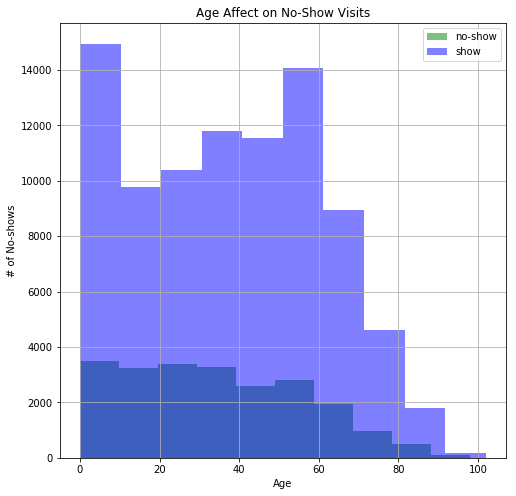

In [88]:
nsa.age[noshow].hist(figsize=(8,8), alpha=0.5, color = 'green', label='no-show');
nsa.age[shows].hist(figsize=(8,8), alpha=0.5, color='blue', label='show');
plt.title('Age Affect on No-Show Visits')
plt.xlabel('Age');
plt.ylabel('# of No-shows');
plt.legend();
plt.show()

In this section, I evaluate the affect of age on the liklihood a patient will not show up for their appointment. The mean age of people showing or not showing up to their appointment is about the same (37 and 34 years old, respectively). The group of patients showing up for their appointments skews right with a large number of 0-10 year olds showing up (possibly due to having someone else responsible for them showing up to their visit, e.g. a parent). The no-show graph is also skewed to the right, but there is very small change in the total quantity of no-shows looking across the dataset. More young patients no-show than the older patients in the dataset, but not a significant amount more to consider age a significant factor in determining if a patient will no-show an appointment. 

### Q4. Age and Text Message Reminders vs. No-Show Visits

In [89]:
nsa_noshow = nsa[noshow].reset_index(drop=True)
smsy = nsa_noshow['sms_received'] == True
smsn = nsa_noshow['sms_received'] == False

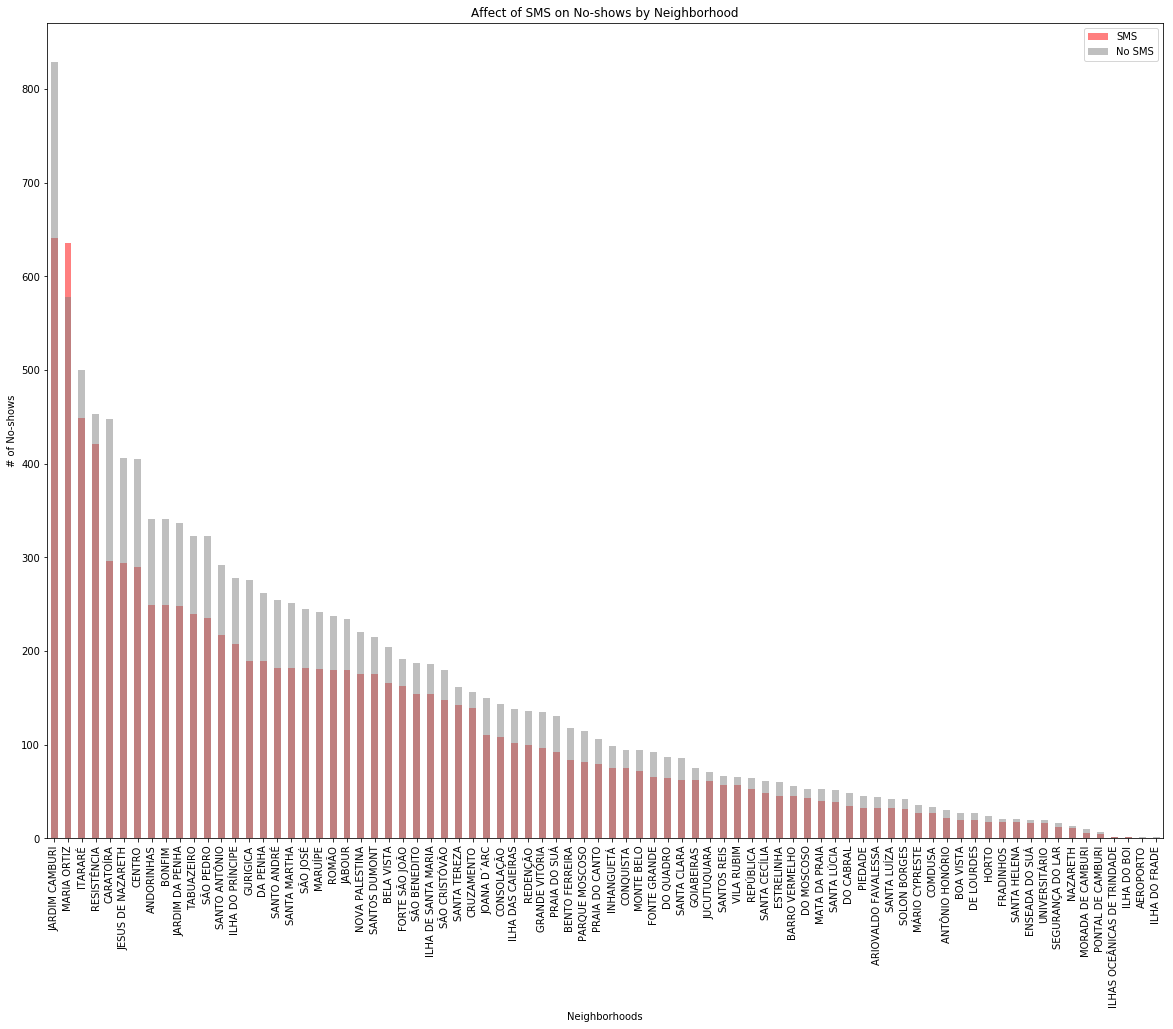

In [90]:
nsa_noshow.neighbourhood[smsy].value_counts().plot(kind='bar',figsize=(20,15),color='red',alpha=0.5, label='SMS');
nsa_noshow.neighbourhood[smsn].value_counts().plot(kind='bar',figsize=(20,15),color='grey',alpha=0.5, label='No SMS');
plt.title('Affect of SMS on No-shows by Neighborhood');
plt.xlabel('Neighborhoods');
plt.ylabel('# of No-shows');
plt.legend();
plt.show();

In [42]:
nsa.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


For the last question, I looked over the impact of the neighborhood where a patient had their appointment and SMS reminders on the quantity of no-shows. There appears to be modest impact on whether a patient recieved an SMS reminder of their appointment and the neighborhood where the hospital is located on if they no-show their appointment. Oddly, the hospital with the second highest no-shows has more no-show visits for patients that received an appointment reminder. The trend across the neighborhoods is the difference in quantity of no-shows between patients who received vs didnt receive a reminder declines as the overall quantity of no show visits drops, indicating that perhaps SMS reminders have less impact on patient no-shows in neighborhood hospitals with lower patient volumes. More data would be necessary to determine if the hospitals themselves impact patient no-shows.

In [135]:
nsav2 = nsa.apply(lambda x: x.factorize()[0]).corr()

<a id='conclusions'></a>
## Conclusions

I looked over a heatmap of all the datapoints and their correlations to evaluate my findings from the project. The quick analysis shows gender, age, scholarship and neighbourhood have limited affect on no-shows while SMS has a weak correlation with no-shows, showing that the indications from my initial look through the data may not have pointed to any true reason patients no-showed. Overall, from the data I evaluated, gender appears to be the best indicator of if a patient will no-show their appointment. The other data points of age, free healthcare, and SMS reminders vs. the neighborhood of the appointment location showed minimal indication of outsized impact on a patient showing up for their appointment. This analysis needs more statistical testing to get a better idea of the impacts the variables have on the liklihood of a patient no-showing their appointment.


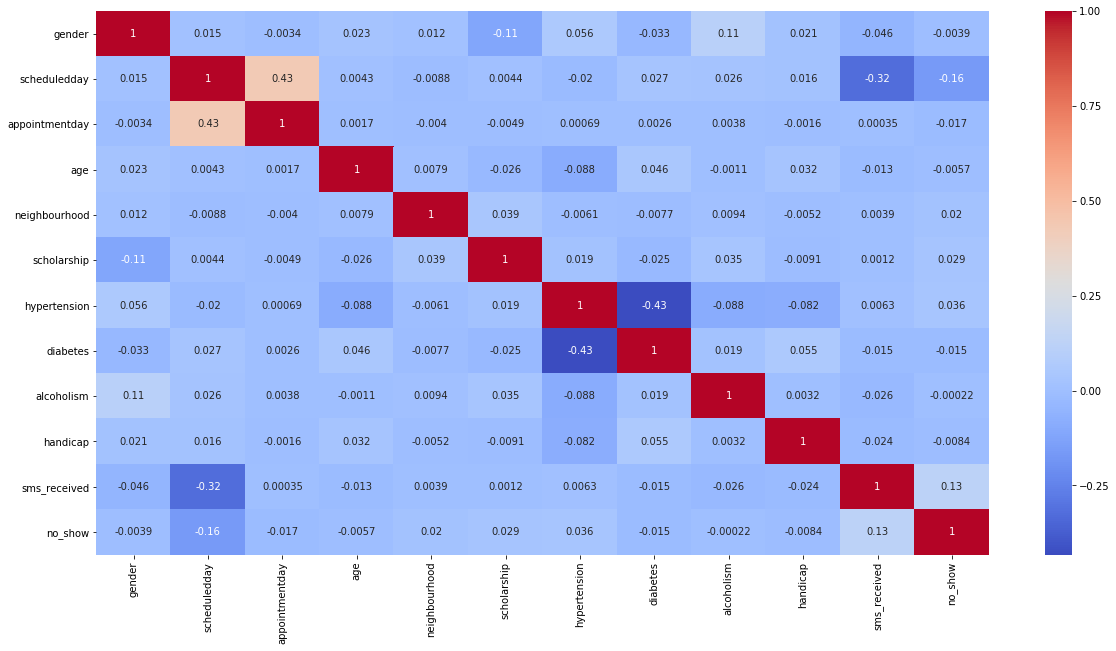

In [137]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(nsav2, annot=True, cmap='coolwarm');

References:

https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    
https://www.dataquest.io/blog/pandas-cheat-sheet/

https://pythonforbiologists.com/when-to-use-aggregatefiltertransform-in-pandas/

https://www.ritchieng.com/pandas-groupby/

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html